In [12]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re, pip, conda

In [13]:
for package in [sklearn,mlp,np,pd,sns,pip,conda]:
    print(re.findall("([^']*)",str(package))[2],package.__version__)

sklearn 1.0.1
matplotlib 3.3.2
numpy 1.23.4
pandas 1.1.3
seaborn 0.11.0
pip 22.3.1
conda 4.9.2


In [3]:
#pip install --upgrade scikit-learn
#conda update scikit-learn

In [4]:
test = pd.read_csv(r"D:\Pythonwork\2022DACase\UserRetentionPrediction\data\test-a-without-label.csv"
                   ,header=0)
#test.columns = ["用户ID","(脱敏后)需要预测的留存分日期"] #中文更有利于理解，英文更有利于敲代码
test.columns = ["user_id","predict_date"]

In [5]:
test.shape #一共1w5用户，出乎意料地少

(15001, 2)

In [6]:
test.head()

,user_id,predict_date
0,10007813,205
1,10052988,210
2,10279068,200
3,10546696,216
4,10406659,183


In [7]:
test.iloc[:,-1].max() #最晚的日期

222

In [8]:
test.iloc[:,-1].min() #最早的日期

161

In [9]:
#检查用户ID是否有重复值
test.iloc[:,0].value_counts()

10007813    1
10395201    1
10476067    1
10544537    1
10407998    1
           ..
10256345    1
10528454    1
10312797    1
10512586    1
10354569    1
Name: user_id, Length: 15001, dtype: int64

In [10]:
test.iloc[:,-1].value_counts()

196    358
200    355
194    354
202    344
203    342
      ... 
171    146
220    145
221    144
216    143
213    143
Name: predict_date, Length: 62, dtype: int64

In [11]:
test.isnull().sum()

user_id         0
predict_date    0
dtype: int64

In [12]:
launch = pd.read_csv(r"D:\Pythonwork\2022DACase\UserRetentionPrediction\data\app_launch_logs.csv",header=0)
#launch.columns = ["用户ID","登录类型","登录日期"]
launch.columns = ["user_id","launch_type","launch_date"]

In [13]:
launch.shape #包含849w+次的登录信息，登录信息的数据量明显远远多于测试集信息

(8493878, 3)

In [14]:
launch.head()

,user_id,launch_type,launch_date
0,10157996,0,129
1,10139583,0,129
2,10277501,0,129
3,10099847,0,129
4,10532773,0,129


In [15]:
launch.isnull().sum() #不存在任何缺失值

user_id        0
launch_type    0
launch_date    0
dtype: int64

In [16]:
launch.drop_duplicates().shape[0] #存在重复值，说明确实存在一个用户在同一日期、用同一设备多次登录的情况，但这种情况并不多

8492342

In [17]:
launch = launch.drop_duplicates() #由于不关心同一日期多次登录的情况，因此我们使用去重后的表单替换原始表单
launch.index = range(launch.shape[0]) #删除样本后需要恢复索引

In [18]:
launch["launch_type"].value_counts() #猜测0类是自发登录APP，1类是通过其他平台登录或通过链接进入APP

0    8109385
1     382957
Name: launch_type, dtype: int64

In [19]:
launch["launch_type"].value_counts()[0]/launch["launch_type"].shape[0]

0.9549056078994463

In [20]:
launch["user_id"].unique().__len__()

600000

In [21]:
launch.head()

,user_id,launch_type,launch_date
0,10157996,0,129
1,10139583,0,129
2,10277501,0,129
3,10099847,0,129
4,10532773,0,129


In [22]:
#随意找出几个排序靠前的用户进行查看
launch.loc[launch["user_id"] == 10157996,:].sort_values(by="launch_date")

,user_id,launch_type,launch_date
7038811,10157996,0,114
7474130,10157996,0,115
4633446,10157996,0,119
7075356,10157996,0,122
280060,10157996,0,127
5823276,10157996,0,128
0,10157996,0,129
5145981,10157996,0,130
3899556,10157996,0,131
6641342,10157996,0,132


In [23]:
launch.loc[launch["user_id"] == 10139583,:].sort_values(by="launch_date")

,user_id,launch_type,launch_date
2653182,10139583,0,128
5810902,10139583,1,128
1,10139583,0,129
2665603,10139583,0,200
7400444,10139583,0,202


In [24]:
df = launch.groupby("launch_date").count()

In [25]:
df.head()

,user_id,launch_type
launch_date,,
100,39302,39302
101,39313,39313
102,39642,39642
103,39054,39054
104,36304,36304


In [26]:
df.shape

(123, 2)

In [27]:
df.index #查看索引即可查看日期范围

Int64Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
            ...
            213, 214, 215, 216, 217, 218, 219, 220, 221, 222],
           dtype='int64', name='launch_date', length=123)

In [ ]:
plt.figure(figsize=(15,9),dpi=200)
sns.set(style="white",font="Simhei", font_scale=1.1)
plt.bar(df.index,df["user_id"],color="#01a2d9",alpha=0.7)
plt.title("不同日期登录的总用户数(条形图)",fontsize=25)
plt.grid()
plt.xticks(ticks = range(100,221,7),fontsize=14);

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 9), dpi=200)
sns.kdeplot(launch["launch_date"],
            shade=True,
            color="#01a2d9",
            label="launch_date",
            alpha=.5)
sns.set(style="whitegrid",font="simhei", font_scale=1.1)
plt.title("不同日期登录总用户数的分布图",fontsize=25)
plt.show()

In [30]:
launch.to_csv(r"D:\Pythonwork\2022DACase\UserRetentionPrediction\data\app_launch_logs_1.csv",index=False)

In [31]:
inter = pd.read_csv(r"D:\Pythonwork\2022DACase\UserRetentionPrediction\data\user_interaction_data.csv"
                   ,header=0)
inter.columns = ["user_id","video_id","inter_type","inter_date"]
#inter.columns = ["用户ID","互动的视频ID","互动类型","(脱敏后)互动日期"]

In [32]:
inter.shape #包含共19.8w次的互动信息

(198608, 4)

In [33]:
inter.head() #互动类型不包括“播放视频”，是发表评论、弹幕、点赞、收藏等类型

,user_id,video_id,inter_type,inter_date
0,10243056,22635954,1,213
1,10203565,24723827,3,213
2,10317559,20413036,2,213
3,10158940,23833050,1,213
4,10376271,22218154,1,213


In [34]:
inter["inter_type"].value_counts() #11种互动类型（不包括播放）

1     87379
10    63958
7     18540
9      9433
2      5142
11     4275
4      4000
8      2256
3      1906
5      1647
6        72
Name: inter_type, dtype: int64

In [35]:
inter["user_id"].unique().__len__() #只有1w9的用户曾经与爱奇艺APP有过互动

19946

In [36]:
inter["video_id"].unique().__len__() #只有4w5的视频曾经被互动过

45536

In [37]:
inter.isnull().sum()

user_id       0
video_id      0
inter_type    0
inter_date    0
dtype: int64

In [38]:
inter.drop_duplicates().shape[0] #删除重复值后原本19w的数据被缩减为只有8w了

86257

In [39]:
#先建立新列，新列中每条样本的值都是1，代表“同一用户、在同一日期、与同一视频进行了一次互动”
inter["inter_count"] = 1

In [40]:
#按照原本存在的4类进行聚合，并对新列inter_count进行计数
inter.groupby(by=["user_id","video_id","inter_type","inter_date"],as_index=False).count()

,user_id,video_id,inter_type,inter_date,inter_count
0,10000069,23376803,9,193,2
1,10000078,20130667,10,175,1
2,10000107,20193958,1,211,2
3,10000107,20208525,1,218,3
4,10000107,20503550,1,221,5
...,...,...,...,...,...
86252,10599985,25023986,7,198,1
86253,10599996,20665255,10,187,3
86254,10599996,22129667,10,210,4
86255,10599996,23775525,10,185,1


In [41]:
inter = inter.groupby(by=["user_id","video_id","inter_type","inter_date"],as_index=False).count()

In [42]:
inter.to_csv(r"D:\Pythonwork\2022DACase\UserRetentionPrediction\data\user_interaction_data_1.csv",index=False)

In [43]:
playback = pd.read_csv(r"D:\Pythonwork\2022DACase\UserRetentionPrediction\data\user_playback_data.csv"
                       ,header=0)
#playback.columns = ["用户ID","视频ID","观看时长","(脱敏后)观看日期"]
playback.columns = ["user_id","video_id","play_duration","play_date"]

In [44]:
playback.shape #包含不同用户7100w+次浏览记录

(71046035, 4)

In [45]:
playback.head() 

,user_id,video_id,play_duration,play_date
0,10057286,20628283.0,2208.612,145
1,10522615,23930557.0,31.054,145
2,10494028,20173699.0,115.952,145
3,10181987,21350426.0,1.585,145
4,10439175,22946929.0,51.726,145


In [46]:
#判断播放时长的单位，该数字明显已超出1天内的秒数
playback["play_duration"].max()

251348.689

In [47]:
24*60

1440

In [48]:
24*60*60 #一天的秒数

86400

In [49]:
24*60*60*3

259200

In [50]:
251348.689/60/60 #假设为秒，该用户在一天内观看了一个视频69小时，考虑是灰黑产的账号，也可能是爱奇艺数据在脱敏过程中产生的问题

69.81908027777779

In [51]:
playback[playback["play_duration"] >= 86400].shape #有多少账号一天内观看视频时长超出了24小时？

(7, 4)

In [52]:
playback.isnull().sum() #缺失6w条视频ID

user_id              0
video_id         60483
play_duration        0
play_date            0
dtype: int64

In [53]:
playback.drop_duplicates().shape[0] #有少量重复值，可以忽略不计

71046030

In [54]:
playback["video_id"].unique().__len__()

4998183

In [55]:
playback["user_id"].unique().__len__() #有54w用户观看了视频，相比之下互动人数真是少得可怜

544536

In [56]:
playback.loc[:,["user_id","video_id"]].groupby("user_id").count().describe() #看过的视频个数，超级长尾数据，明显有异常值

,video_id
count,544536.000000
mean,130.359704
std,653.054375
min,0.000000
25%,4.000000
50%,17.000000
75%,77.000000
max,56150.000000


In [57]:
(playback.loc[:,["user_id","play_duration"]].groupby("user_id").sum()/60).describe() #看过的时长，同样超级长尾数据，同样明显存在异常值

,play_duration
count,544536.000000
mean,881.578446
std,2237.300825
min,0.000017
25%,5.637638
50%,105.233392
75%,748.778250
max,105398.483683


In [58]:
playback.loc[:,["user_id","play_duration","play_date"]].groupby(by=["user_id","play_date"]).mean()/60 #转化为分钟

play_duration
user_id  play_date               
10000000 131            30.885050
         132            10.410033
         164             9.293433
         195            21.559750
10000001 117            41.927900
...                           ...
10599997 164            16.450492
         165            22.307025
         166            18.988150
         173             1.088408
10599999 144            12.672617

[6202463 rows x 1 columns]

In [59]:
video = pd.read_csv(r"D:\Pythonwork\2022DACase\UserRetentionPrediction\data\video_related_data.csv"
                       ,header=0)
#video.columns = ["视频ID","视频时长","合集ID","视频标签","演出阵容"]
video.columns = ["video_id","video_duration","group_id","tag_list","cast"]

In [60]:
video.shape #包含424w个视频的记录

(4250105, 5)

In [61]:
video.head()

,video_id,video_duration,group_id,tag_list,cast
0,24403453.0,6.0,NaN,50365080;50338575;50313222;50165986,NaN
1,22838795.0,7.0,NaN,50001708;50323515;50125414,NaN
2,24181187.0,5.0,NaN,50181045;50008354;50186586;50097060;50136213;5...,NaN
3,23549051.0,NaN,NaN,NaN,NaN
4,20276917.0,8.0,NaN,50286627;50257578;50415463,NaN


In [62]:
video["video_duration"].max()

16.0

In [63]:
video["video_duration"].min()

1.0

In [64]:
video.isnull().sum() #大量缺失

video_id               66
video_duration     364078
group_id          2820142
tag_list           592337
cast              3775461
dtype: int64

In [65]:
video.drop_duplicates().shape[0] #没有任何重复值

4250105

In [66]:
user = pd.read_csv(r"D:\Pythonwork\2022DACase\UserRetentionPrediction\data\user_portrait_data.csv"
                       ,header=0)
#user.columns = ["用户ID","设备类型","设备运存RAM","设备内存ROM","性别","年龄段","教育程度","职业","邮编"]

In [67]:
user.shape #包含59w用户的画像

(596906, 9)

In [68]:
user.head()

,user_id,device_type,device_ram,device_rom,sex,age,education,occupation_status,territory_code
0,10209854,2.0,5731,109581,1.0,2.0,0.0,1.0,865101.0
1,10230057,2.0,1877,20888,1.0,4.0,0.0,1.0,864102.0
2,10194990,2.0,7593,235438,2.0,3.0,1.0,1.0,866540.0
3,10046058,2.0,NaN,55137,1.0,4.0,0.0,1.0,NaN
4,10290885,2.0,2816,52431,1.0,4.0,0.0,0.0,NaN


In [69]:
user["user_id"].unique().__len__() #有一个重复用户ID，可以忽略不计

596905

In [70]:
user.isnull().sum() #有缺失值但占比不高，可以进行缺失值填补

user_id                  0
device_type            339
device_ram           37772
device_rom           28434
sex                   6447
age                   7738
education            11003
occupation_status     7983
territory_code       37281
dtype: int64

In [71]:
user.drop_duplicates().shape[0] #没有重复值

596905

In [72]:
user.head()

,user_id,device_type,device_ram,device_rom,sex,age,education,occupation_status,territory_code
0,10209854,2.0,5731,109581,1.0,2.0,0.0,1.0,865101.0
1,10230057,2.0,1877,20888,1.0,4.0,0.0,1.0,864102.0
2,10194990,2.0,7593,235438,2.0,3.0,1.0,1.0,866540.0
3,10046058,2.0,NaN,55137,1.0,4.0,0.0,1.0,NaN
4,10290885,2.0,2816,52431,1.0,4.0,0.0,0.0,NaN


In [73]:
user.info() #查看数据类型，查看数据分布

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596906 entries, 0 to 596905
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            596906 non-null  int64  
 1   device_type        596567 non-null  float64
 2   device_ram         559134 non-null  object 
 3   device_rom         568472 non-null  object 
 4   sex                590459 non-null  float64
 5   age                589168 non-null  float64
 6   education          585903 non-null  float64
 7   occupation_status  588923 non-null  float64
 8   territory_code     559625 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.0+ MB


In [74]:
user["age"].value_counts()

3.0    254250
4.0    201286
2.0     80789
5.0     37283
1.0     15560
Name: age, dtype: int64

In [75]:
#对所有列使用众数进行填补
for column in user.columns:
    user[column] = user[column].fillna(user[column].value_counts().index[0])

In [76]:
user.isnull().sum()

user_id              0
device_type          0
device_ram           0
device_rom           0
sex                  0
age                  0
education            0
occupation_status    0
territory_code       0
dtype: int64

In [77]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596906 entries, 0 to 596905
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            596906 non-null  int64  
 1   device_type        596906 non-null  float64
 2   device_ram         596906 non-null  object 
 3   device_rom         596906 non-null  object 
 4   sex                596906 non-null  float64
 5   age                596906 non-null  float64
 6   education          596906 non-null  float64
 7   occupation_status  596906 non-null  float64
 8   territory_code     596906 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.0+ MB


In [ ]:
#直接令device_ram和device_rom转变为浮点数，则会报错。
user["device_ram"].astype("float64")

In [ ]:
user["device_rom"].astype("float64")

In [79]:
#如何找出所有含分号的样本？可以使用正则表达式，也可以先将所有值转换为字符串后，再提取出字符串长度大于正常长度的样本
user["device_ram"] = user["device_ram"].astype(str)
user["device_rom"] = user["device_rom"].astype(str)

In [80]:
user.loc[user["device_ram"].apply(lambda x : len(x) > 5),"device_ram"]

5289       7625;3595
5732       7547;7567
7640       7396;7394
8921       3656;5664
12574      7705;7690
             ...    
584623    5734;11276
585043    11388;3711
587763     5666;5621
591167     5666;5634
592656     5987;5988
Name: device_ram, Length: 194, dtype: object

In [81]:
user.loc[user["device_rom"].apply(lambda x : len(x) > 6),"device_rom"]

2766           51872;52472
5289          55034;111304
7797         228635;228835
8921         110757;110069
16212          52170;52370
                ...       
587763       111289;227939
589841             1023946
591167       110022;111225
591547          3760;10363
593964    2671;2354;255989
Name: device_rom, Length: 289, dtype: object

In [82]:
user["device_rom"] = user["device_rom"].apply(lambda x:x.split(";")[-1]).astype("float64")
user["device_ram"] = user["device_ram"].apply(lambda x:x.split(";")[-1]).astype("float64")

In [83]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596906 entries, 0 to 596905
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            596906 non-null  int64  
 1   device_type        596906 non-null  float64
 2   device_ram         596906 non-null  float64
 3   device_rom         596906 non-null  float64
 4   sex                596906 non-null  float64
 5   age                596906 non-null  float64
 6   education          596906 non-null  float64
 7   occupation_status  596906 non-null  float64
 8   territory_code     596906 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 41.0 MB


In [84]:
user.to_csv(r"D:\Pythonwork\2022DACase\UserRetentionPrediction\data\user_portrait_data_1.csv",index=False)

In [90]:
for name,column,data in zip(["测试数据","登录数据","互动数据","播放数据"]
                            ,["predict_date","launch_date","inter_date","play_date"]
                            ,[test,launch,inter,playback]):
    max_ = data[column].max()
    min_ = data[column].min()
    print(name,"覆盖时间周期为",min_,"to",max_)

测试数据 覆盖时间周期为 161 to 222
登录数据 覆盖时间周期为 100 to 222
互动数据 覆盖时间周期为 172 to 222
播放数据 覆盖时间周期为 100 to 222


In [510]:
test.head()

,user_id,predict_date
0,10007813,205
1,10052988,210
2,10279068,200
3,10546696,216
4,10406659,183


In [512]:
test["predict_date"].value_counts()

196    358
200    355
194    354
202    344
203    342
      ... 
171    146
220    145
221    144
216    143
213    143
Name: predict_date, Length: 62, dtype: int64

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/08.1.png)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df=pd.read_csv(r'D:\Pythonwork\2022DACase\UserRententionPrediction\data\perrin-freres-monthly-champagne.csv')

In [15]:
df.head() #香槟销售额随时间变化的数据

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


- 简单数据探索与清洗

In [16]:
df["Month"].dtype

dtype('O')

In [17]:
df.iloc[:,-1].dtype

dtype('float64')

In [18]:
#确定列名，检验缺失值、填补/删除缺失值等等
df.columns=["Month","Sales"]
df.drop(106,axis=0,inplace=True)
df.drop(105,axis=0,inplace=True)

#转化时间字符串为DataTime格式
df['Month']=pd.to_datetime(df['Month'])

#将时间设置为索引
df.set_index('Month',inplace=True)

In [19]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


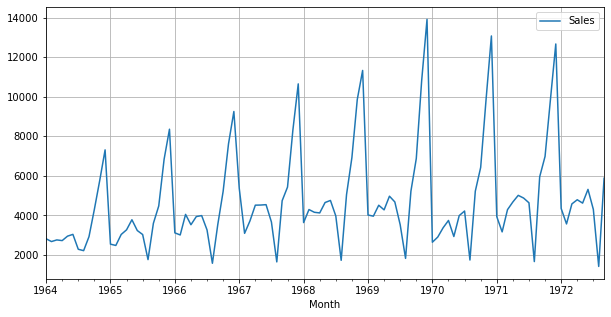

In [31]:
#可视化
df.plot(figsize=(10,5),grid=True);

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
result=adfuller(df["Sales"]) #这就可以完成一次检验

In [34]:
result #直接返回一系列结果

(-1.8335930563276195,
 0.3639157716602467,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [35]:
def adfuller_test(sales):
    #将唯一的标签：销售额放入检验
    result=adfuller(sales)
    
    #让statsmodel的DF单位根检验为我们返回检验值 & p值 & 添加了多少滞后 & 使用的样本量
    labels = ['ADF Test Statistic','p-value']
    
    #打包标签和结果
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    #如果p值小于等于0.05，则说明我们可以拒绝原假设，认为数据是平稳的。如果p值大于0.05，则说明我们需要接受原假设，数据不平稳。
    if result[1] <= 0.05:
        print("拒绝原假设，数据具有平稳性")
    else:
        print("无法拒绝原假设，数据不平稳")
        
    return result[1]

In [36]:
pvalue = adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276195
p-value : 0.3639157716602467
无法拒绝原假设，数据不平稳


In [37]:
pvalue

0.3639157716602467

In [38]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [39]:
#使用shift函数构造差分，shift(1)函数相当于滞后1（1步差分）
df['Sales'] - df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
               ...  
1972-05-01    -170.0
1972-06-01     694.0
1972-07-01   -1014.0
1972-08-01   -2885.0
1972-09-01    4464.0
Name: Sales, Length: 105, dtype: float64

In [40]:
df["Sales"].diff().dropna() #一阶差分可以直接通过diff()命令完成

Month
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
1964-06-01      90.0
               ...  
1972-05-01    -170.0
1972-06-01     694.0
1972-07-01   -1014.0
1972-08-01   -2885.0
1972-09-01    4464.0
Name: Sales, Length: 104, dtype: float64

In [41]:
#注意区分2阶差分和2步差分
#2步差分
df['Sales'] - df['Sales'].shift(2)

Month
1964-01-01       NaN
1964-02-01       NaN
1964-03-01     -60.0
1964-04-01      49.0
1964-05-01     191.0
               ...  
1972-05-01      41.0
1972-06-01     524.0
1972-07-01    -320.0
1972-08-01   -3899.0
1972-09-01    1579.0
Name: Sales, Length: 105, dtype: float64

In [42]:
#2阶差分
df["Sales"].diff().diff().dropna()

Month
1964-03-01     226.0
1964-04-01    -117.0
1964-05-01     259.0
1964-06-01    -135.0
1964-07-01    -844.0
               ...  
1972-05-01    -381.0
1972-06-01     864.0
1972-07-01   -1708.0
1972-08-01   -1871.0
1972-09-01    7349.0
Name: Sales, Length: 103, dtype: float64

In [43]:
#可以通过循环，查看究竟多少步差分能够让这一序列满足单位根检验
#如果许多差分都能够满足单位根检验，我们通常选择ADF值最小、或差分后数据方差最小的步数

columns = ["D1","D2","D3","D4","D5","D6","D7","D8","D9","D10","D11","D12","D24","D36"]
pvalues = []
stds = []

for idx,degree in enumerate([*range(1,13),24,36]):
    #打印差分的步数
    print("{}步差分".format(degree))
    
    #计算差分列
    df[columns[idx]] = df["Sales"] - df["Sales"].shift(idx+1)
    
    #进行ADF检验，提取P值，并计算差分列的标准差
    pvalue = adfuller_test(df[columns[idx]].dropna())
    std_ = df[columns[idx]].std()
    
    #保存P值和标准差
    pvalues.append(pvalue)
    stds.append(std_)
    
    #对结果进行打印
    print("差分后数据的标准差为{}".format(std_))
    print("\n")

1步差分
ADF Test Statistic : -7.189896448051006
p-value : 2.51962044738698e-10
拒绝原假设，数据具有平稳性
差分后数据的标准差为2650.968186669989


2步差分
ADF Test Statistic : -7.135995302286716
p-value : 3.4199891594729983e-10
拒绝原假设，数据具有平稳性
差分后数据的标准差为3567.6351723537286


3步差分
ADF Test Statistic : -7.285630595925722
p-value : 1.4614244887641837e-10
拒绝原假设，数据具有平稳性
差分后数据的标准差为3927.279876517501


4步差分
ADF Test Statistic : -7.253149049898573
p-value : 1.758579949850846e-10
拒绝原假设，数据具有平稳性
差分后数据的标准差为4090.0957191830116


5步差分
ADF Test Statistic : -2.8571173948549804
p-value : 0.050566743535901404
无法拒绝原假设，数据不平稳
差分后数据的标准差为3703.1920631348094


6步差分
ADF Test Statistic : -7.278597607548264
p-value : 1.5212208957659128e-10
拒绝原假设，数据具有平稳性
差分后数据的标准差为3540.5571256000353


7步差分
ADF Test Statistic : -1.74747216860766
p-value : 0.40683412640557615
无法拒绝原假设，数据不平稳
差分后数据的标准差为3726.756506409909


8步差分
ADF Test Statistic : -2.0559478573458687
p-value : 0.26259291600017703
无法拒绝原假设，数据不平稳
差分后数据的标准差为4203.561065940937


9步差分
ADF Test Statistic : -1.6

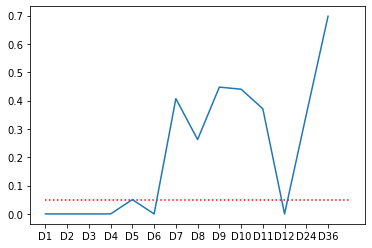

In [44]:
#哪些步数下数据是平稳的？
plt.plot(columns,pvalues)
plt.hlines(0.05,0,14,colors="red",linestyles="dotted");

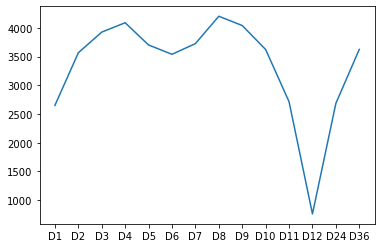

In [45]:
#最小的标准差对应的步数是？
plt.plot(columns,stds);

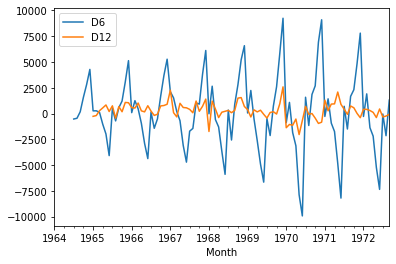

In [46]:
df[['D6',"D12"]].plot();

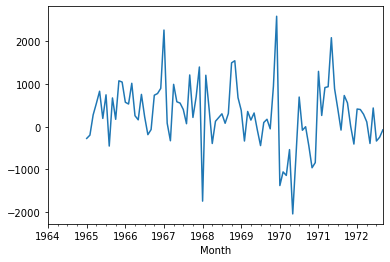

In [47]:
df['D12'].plot();

In [48]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

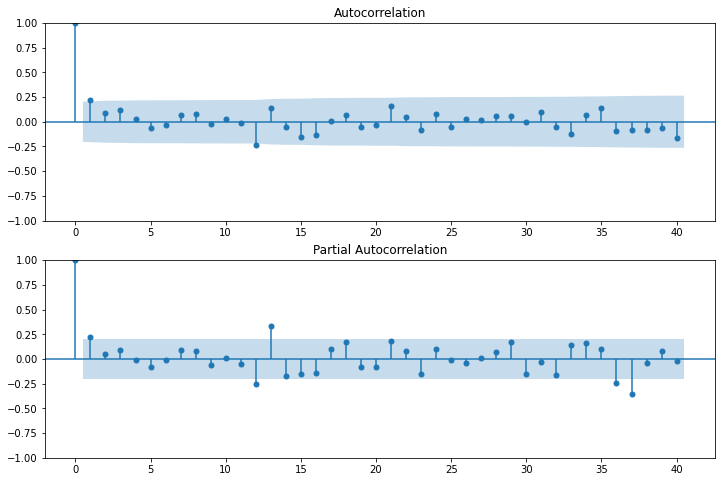

In [49]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['D12'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['D12'].dropna(),lags=40,ax=ax2)

0阶差分的标准差为2553.5026011831437
1阶差分的标准差为2650.968186669989
2阶差分的标准差为3907.4512785194675
3阶差分的标准差为6577.656456299289


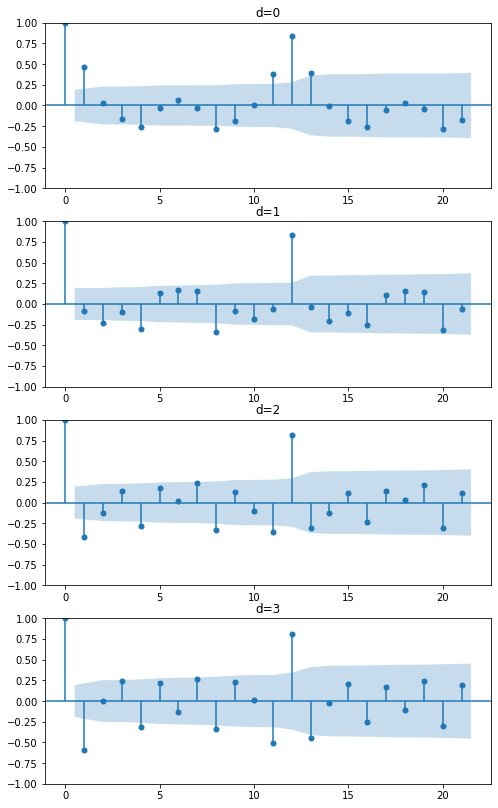

In [50]:
from statsmodels.graphics.tsaplots import plot_acf

diff = [df["Sales"],df["Sales"].diff().dropna()
        ,df["Sales"].diff().diff().dropna()
        ,df["Sales"].diff().diff().diff().dropna()
       ]

titles = ["d=0","d=1","d=2","d=3"]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(8,14))

for idx, ts, fig, title in zip(range(4),diff,[ax1,ax2,ax3,ax4],titles):
    print("{}阶差分的标准差为{}".format(idx,ts.std()))
    plot_acf(ts, ax=fig, title=title)

In [51]:
import statsmodels
print(statsmodels.__version__)

0.13.5


In [52]:
from statsmodels.tsa.arima.model import ARIMA
#在0.12及以上版本的statsmodel中，ARIMA一个类可以实现AR、MA、ARMA、ARIMA和SARIMA模型
from pandas.tseries.offsets import DateOffset
#statsmodel库正处于更新期，因此会出现各种各样奇奇怪怪的警告……
import warnings
warnings.filterwarnings("ignore")

In [53]:
df.head()

,Sales,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D24,D36
Month,,,,,,,,,,,,,,,
1964-01-01,2815.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-03-01,2755.0,83.0,-60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-04-01,2721.0,-34.0,49.0,-94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-05-01,2946.0,225.0,191.0,274.0,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df.index.inferred_freq #当前时序数据的频率为月份

'MS'

In [74]:
df.index = pd.DatetimeIndex(df.index.values,
                            freq=df.index.inferred_freq)

由于数据具有较强的周期性，因此我们考虑同时建立d=0的ARIMA和d=1的SARIMA模型。

> 先建一个模型试试看

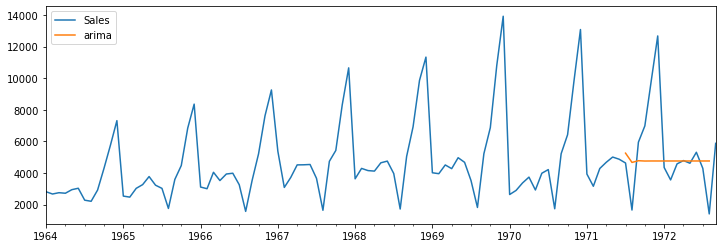

In [75]:
#对每个备选模型，我们进行训练、打印训练结果，并绘制预测图像
arima_0=ARIMA(endog = df['Sales'],order=(1,0,1))
arima_0=arima_0.fit()
df['arima']=arima_0.predict(start=90,end=103,dynamic=True)
df[['Sales','arima']].plot(figsize=(12,4));

In [76]:
print(arima_0.summary(alpha=0.05))
#alpha - 人为规定的显著性水平，一般都使用0.05或者0.01

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -955.880
Date:                Mon, 07 Nov 2022   AIC                           1919.760
Time:                        00:38:08   BIC                           1930.375
Sample:                    01-01-1964   HQIC                          1924.061
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4761.1524    437.563     10.881      0.000    3903.544    5618.760
ar.L1         -0.1845      0.130     -1.420      0.156      -0.439       0.070
ma.L1          0.7883      0.107      7.382      0.0

In [77]:
#对已经建好的模型，我们可以使用如下的属性调出该模型的残差r
arima_0.resid

1964-01-01   -1946.152444
1964-02-01   -1334.461564
1964-03-01   -1492.756776
1964-04-01   -1331.169605
1964-05-01   -1193.671956
                 ...     
1972-05-01    -790.077042
1972-06-01    1147.266451
1972-07-01   -1265.917337
1972-08-01   -2435.669426
1972-09-01    2418.085584
Freq: MS, Length: 105, dtype: float64

In [78]:
#备选模型
arimas = [ARIMA(endog = df['Sales'],order=(1,0,1))
         ,ARIMA(endog = df['Sales'],order=(1,0,2))
         ,ARIMA(endog = df['Sales'],order=(2,0,1))
         ,ARIMA(endog = df['Sales'],order=(2,0,2))
         ,ARIMA(endog = df['Sales'],order=(1,0,3))
         ,ARIMA(endog = df['Sales'],order=(3,0,1))
         ,ARIMA(endog = df['Sales'],order=(3,0,2))
         ,ARIMA(endog = df['Sales'],order=(2,0,3))
         ,ARIMA(endog = df['Sales'],order=(3,0,3))
         ]
sarimas = [ARIMA(endog = df['Sales'],seasonal_order=(1,1,1,12))
          ,ARIMA(endog = df['Sales'],seasonal_order=(1,1,2,12))
          ,ARIMA(endog = df['Sales'],seasonal_order=(2,1,1,12))
          ,ARIMA(endog = df['Sales'],seasonal_order=(2,1,2,12))
          ,ARIMA(endog = df['Sales'],seasonal_order=(1,1,3,12))
          ,ARIMA(endog = df['Sales'],seasonal_order=(3,1,1,12))
          ,ARIMA(endog = df['Sales'],seasonal_order=(3,1,2,12))
          ,ARIMA(endog = df['Sales'],seasonal_order=(2,1,3,12))
          ,ARIMA(endog = df['Sales'],seasonal_order=(3,1,3,12))
          ]

In [79]:
def plot_summary(models,summary=True,model_name=[]):
    """绘制图像并打印summary的函数"""
    for idx,model in enumerate(models):
        m = model.fit()
        if summary:
            print("\n")
            print(model_name[idx])
            print(m.summary(alpha=0.01))
        else:
            df["model"] = m.predict(start=90,end=103,dynamic=True)
            df[['Sales','model']].plot(figsize=(12,2),title="Model {}".format(idx))

In [ ]:
plot_summary(arimas,False) #先进行图像的绘制，从预测结果中选出效果可能比较好的参数组合

In [ ]:
plot_summary(sarimas,False) #先进行图像的绘制，从预测结果中选出效果可能比较好的参数组合

In [82]:
#打印较好的参数组合的summary
plot_summary([sarimas[1],sarimas[2],sarimas[3],sarimas[5]]
             ,model_name=["SARIMA01","SARIMA02","SARIMA03","SARIMA05"])



SARIMA01
                                  SARIMAX Results                                  
Dep. Variable:                       Sales   No. Observations:                  105
Model:             ARIMA(1, 1, [1, 2], 12)   Log Likelihood                -754.700
Date:                     Mon, 07 Nov 2022   AIC                           1517.400
Time:                             00:39:04   BIC                           1527.530
Sample:                         01-01-1964   HQIC                          1521.490
                              - 09-01-1972                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.005      0.995]
------------------------------------------------------------------------------
ar.S.L12       0.9999      0.001    722.272      0.000       0.996       1.004
ma.S.L12      -1.2211      0.065    -18.750      0.000      -1.389      -1.053
m

模型编号|模型|AIC|系数单变量检验<br>（alpha=0.01）|残差相关性检验<br>（alpha=0.01）|残差异方差检验<br>（alpha=0.01）|残差正态性检验<br>（alpha=0.01）|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
01|(1,1,2,12)|1517.400|✔|不通过|✔|✔|
02|(2,1,1,12)|1505.725|不通过|✔|✔|✔|
03|(2,1,2,12)|1564.210|✔|✔|✔|不通过|
05|(3,1,1,12)|1507.042|不通过|✔|✔|✔|

In [83]:
updates = [ARIMA(df["Sales"],seasonal_order=(1,1,1,12)) #00号模型，不过在最初画图的时候没有被我们选出来
         ,ARIMA(df["Sales"],seasonal_order=(2,0,1,12)) #取消高阶差分
         ,ARIMA(df["Sales"],seasonal_order=(2,1,1,4)) #降低多步差分的步数
        ]

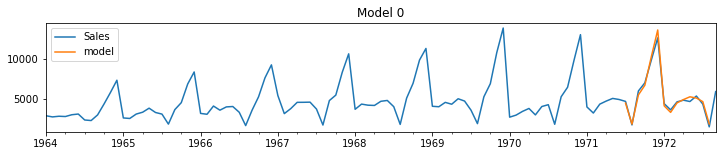

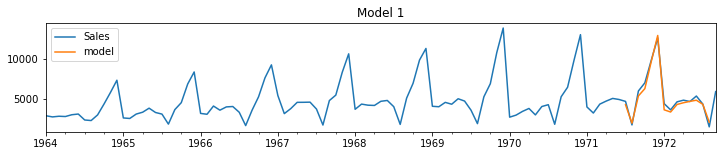

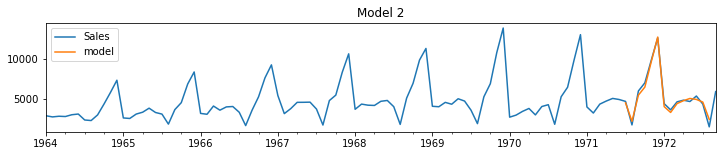

In [196]:
plot_summary(updates,False) #先进行图像的绘制，从预测结果中选出效果可能比较好的参数组合

In [197]:
plot_summary(updates,True,["降低p的阶数","降低差分阶数","降低差分步数"])



降低p的阶数
                                SARIMAX Results                                 
Dep. Variable:                    Sales   No. Observations:                  105
Model:             ARIMA(1, 1, [1], 12)   Log Likelihood                -750.716
Date:                  Fri, 04 Nov 2022   AIC                           1507.432
Time:                          22:44:41   BIC                           1515.030
Sample:                      01-01-1964   HQIC                          1510.500
                           - 09-01-1972                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.005      0.995]
------------------------------------------------------------------------------
ar.S.L12       0.9804      0.127      7.709      0.000       0.653       1.308
ma.S.L12      -0.9228      0.281     -3.288      0.001      -1.646      -0.200
sigma2      5.969e+05   1.0

模型编号|模型|AIC|系数单变量检验<br>（alpha=0.01）|残差相关性检验<br>（alpha=0.01）|残差异方差检验<br>（alpha=0.01）|残差正态性检验<br>（alpha=0.01）|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
原始模型|(2,1,1,12)|1505.725|不通过|✔|✔|✔|
降低AR的阶数|(1,1,1,12)|1507.432|✔|✔|✔|✔|
降低差分阶数|(2,0,1,12)|1736.269|不通过|不通过|✔|✔|
降低差分步数|(2,1,1,4)|1719.996|不通过|不通过|✔|不通过|

### VARMA

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
dta = sm.datasets.webuse('lutkepohl2', 'https://www.stata-press.com/data/r12/')

In [4]:
dta.head()

,inv,inc,consump,qtr,ln_inv,dln_inv,ln_inc,dln_inc,ln_consump,dln_consump
0,180,451,415,1960-01-01,5.192957,NaN,6.111467,NaN,6.028278,NaN
1,179,465,421,1960-04-01,5.187386,-0.005571,6.142037,0.030570,6.042633,0.014355
2,185,485,434,1960-07-01,5.220356,0.032970,6.184149,0.042111,6.073044,0.030411
3,192,493,448,1960-10-01,5.257495,0.037139,6.200509,0.016360,6.104793,0.031749
4,211,509,459,1961-01-01,5.351858,0.094363,6.232448,0.031939,6.129050,0.024257


In [5]:
dta.index = dta.qtr #将时间窗口作为索引
dta.index.freq = dta.index.inferred_freq #让statsmodel认知时间的频率

In [6]:
dta.head()

,inv,inc,consump,qtr,ln_inv,dln_inv,ln_inc,dln_inc,ln_consump,dln_consump
qtr,,,,,,,,,,
1960-01-01,180,451,415,1960-01-01,5.192957,NaN,6.111467,NaN,6.028278,NaN
1960-04-01,179,465,421,1960-04-01,5.187386,-0.005571,6.142037,0.030570,6.042633,0.014355
1960-07-01,185,485,434,1960-07-01,5.220356,0.032970,6.184149,0.042111,6.073044,0.030411
1960-10-01,192,493,448,1960-10-01,5.257495,0.037139,6.200509,0.016360,6.104793,0.031749
1961-01-01,211,509,459,1961-01-01,5.351858,0.094363,6.232448,0.031939,6.129050,0.024257


In [7]:
#从中取出一段时间 + 三列作为例子
endog = dta.loc['1960-04-01':'1978-10-01', ['dln_inv', 'dln_inc', 'dln_consump']]

In [8]:
#观察多变量时序数据的结构
#同样的时间，根据不同的变量，有不同的数值
#必须将数据整理成如下结构，才能够输入到statsmodel的VARMA中
endog

,dln_inv,dln_inc,dln_consump
qtr,,,
1960-04-01,-0.005571,0.030570,0.014355
1960-07-01,0.032970,0.042111,0.030411
1960-10-01,0.037139,0.016360,0.031749
1961-01-01,0.094363,0.031939,0.024257
1961-04-01,-0.043591,0.021381,-0.002181
...,...,...,...
1977-10-01,0.026188,0.021032,0.017272
1978-01-01,0.025520,0.010843,0.012479
1978-04-01,0.035580,0.014599,0.018431


In [9]:
#建立一个VAR(2)模型，变量数此时为3
mod = sm.tsa.VARMAX(endog #建模数据 - 必须是多变量
                    , order=(2,0) #p,q
                   )
res = mod.fit(maxiter=1000, disp=False) #为什么会需要迭代？
print(res.summary())

                                     Statespace Model Results                                    
Dep. Variable:     ['dln_inv', 'dln_inc', 'dln_consump']   No. Observations:                   75
Model:                                            VAR(2)   Log Likelihood                 621.917
                                             + intercept   AIC                          -1189.835
Date:                                   Wed, 15 Feb 2023   BIC                          -1127.263
Time:                                           19:43:25   HQIC                         -1164.851
Sample:                                       04-01-1960                                         
                                            - 10-01-1978                                         
Covariance Type:                                     opg                                         
Ljung-Box (L1) (Q):       0.02, 0.01, 0.19   Jarque-Bera (JB):    11.54, 8.00, 1.54
Prob(Q):                  0.89, 0.

In [10]:
endog.head()

,dln_inv,dln_inc,dln_consump
qtr,,,
1960-04-01,-0.005571,0.030570,0.014355
1960-07-01,0.032970,0.042111,0.030411
1960-10-01,0.037139,0.016360,0.031749
1961-01-01,0.094363,0.031939,0.024257
1961-04-01,-0.043591,0.021381,-0.002181


In [12]:
#建立带外生变量的VAR模型，此时变量数为2
exog = endog['dln_consump']
mod = sm.tsa.VARMAX(endog[['dln_inv', 'dln_inc']], order=(2,0),exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['dln_inv', 'dln_inc']   No. Observations:                   75
Model:                            VARX(2)   Log Likelihood                 366.961
                              + intercept   AIC                           -703.922
Date:                    Wed, 15 Feb 2023   BIC                           -669.160
Time:                            19:47:44   HQIC                          -690.042
Sample:                        04-01-1960                                         
                             - 10-01-1978                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):             0.13, 2.47   Jarque-Bera (JB):          12.23, 1.06
Prob(Q):                        0.72, 0.12   Prob(JB):                   0.00, 0.59
Heteroskedasticity (H):         0.45, 0.54   Skew:                      0.23, -0.29
P

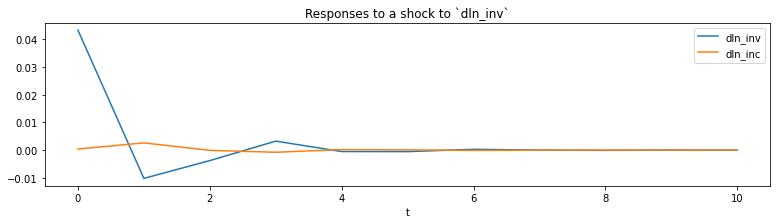

In [15]:
ax = res.impulse_responses(10, orthogonalized=True, impulse=[1, 0]).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `dln_inv`');

In [1]:
#!pip install pmdarima

In [13]:
import warnings
warnings.filterwarnings("ignore")
import pmdarima as pm
from pmdarima import model_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [14]:
data = pm.datasets.load_wineind()

In [15]:
data

array([15136., 16733., 20016., 17708., 18019., 19227., 22893., 23739.,
       21133., 22591., 26786., 29740., 15028., 17977., 20008., 21354.,
       19498., 22125., 25817., 28779., 20960., 22254., 27392., 29945.,
       16933., 17892., 20533., 23569., 22417., 22084., 26580., 27454.,
       24081., 23451., 28991., 31386., 16896., 20045., 23471., 21747.,
       25621., 23859., 25500., 30998., 24475., 23145., 29701., 34365.,
       17556., 22077., 25702., 22214., 26886., 23191., 27831., 35406.,
       23195., 25110., 30009., 36242., 18450., 21845., 26488., 22394.,
       28057., 25451., 24872., 33424., 24052., 28449., 33533., 37351.,
       19969., 21701., 26249., 24493., 24603., 26485., 30723., 34569.,
       26689., 26157., 32064., 38870., 21337., 19419., 23166., 28286.,
       24570., 24001., 33151., 24878., 26804., 28967., 33311., 40226.,
       20504., 23060., 23562., 27562., 23940., 24584., 34303., 25517.,
       23494., 29095., 32903., 34379., 16991., 21109., 23740., 25552.,
      

In [16]:
len(data)

176

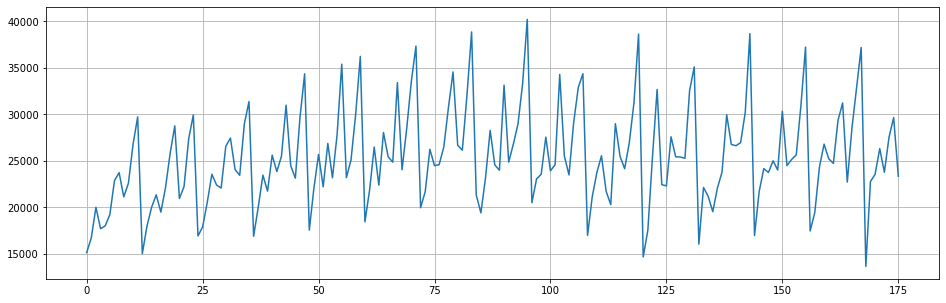

In [17]:
fig = plt.figure(figsize=(16,5))
plt.plot(range(data.shape[0]),data)
plt.grid();

In [25]:
#使用pm分割数据，遵循时序规则，不会打乱时间顺序
train, test = model_selection.train_test_split(data, train_size=152)

In [27]:
#5秒之内自动化建模，只支持SARIMAX混合模型，不支持VARMAX系列模型
arima = pm.auto_arima(train, trace=True, #训练数据，是否打印训练过程？
                      error_action='ignore', suppress_warnings=True, #无视警告和错误
                      maxiter=5, #允许的最大迭代次数
                      seasonal=True, m=12 #是否使用季节性因子？如果使用的话，多步预测的步数是多少？
                     )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2955.247, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3090.160, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2993.480, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2985.395, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3088.177, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2978.426, Time=0.09 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2954.744, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=3025.510, Time=0.04 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2954.236, Time=0.37 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2958.264, Time=0.44 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=2964.588, Time=0.36 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=2950.034, Time=0.47 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=2950.338, Time=0.12 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=2953.291, Time=0.42 sec
 ARIMA(2,1,1)(1,0,1

In [33]:
endog.head()

,dln_inv,dln_inc,dln_consump
qtr,,,
1960-04-01,-0.005571,0.030570,0.014355
1960-07-01,0.032970,0.042111,0.030411
1960-10-01,0.037139,0.016360,0.031749
1961-01-01,0.094363,0.031939,0.024257
1961-04-01,-0.043591,0.021381,-0.002181


In [ ]:
train_m, test_m = model_selection.train_test_split(endog, train_size=50)
varma = pm.auto_arima(train_m)

In [ ]:
#预测 - n_periods向未来预测，无法对训练的时间进行预测
preds = arima.predict(n_periods=test.shape[0])

In [ ]:
preds #按照测试集的日期进行预测

array([25809.09822027, 27111.50500611, 30145.84346715, 35069.09860267,
       19044.09098919, 22734.07766136, 24370.14476344, 24468.4989244 ,
       24661.71940304, 24465.6250753 , 29285.02123954, 25607.32326197,
       26131.79439226, 26937.20321329, 29632.82588046, 33904.51565498,
       20207.31393733, 23342.10936251, 24741.41755828, 24828.6385991 ,
       24993.22466868, 24825.14042152, 28939.23990247, 25799.92370898])

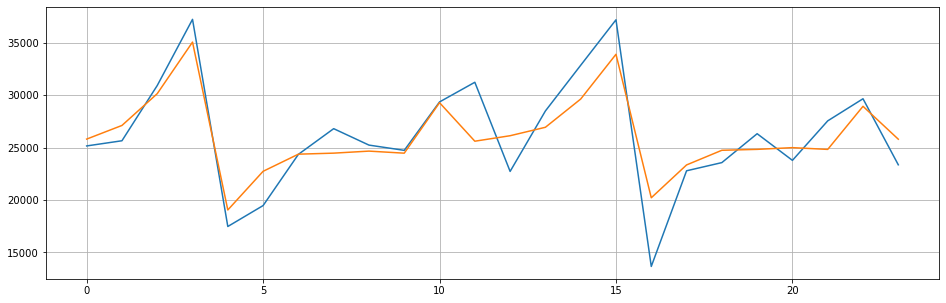

In [31]:
fig = plt.figure(figsize=(16,5))
plt.plot(range(test.shape[0]),test)
plt.plot(range(test.shape[0]),preds)
plt.grid();

In [10]:
#评估指标 - 可共用sklearn的评估指标，也可调用特定的时序指标AIC
np.sqrt(mean_squared_error(test, preds))

2550.882609342123

In [11]:
arima.aic()

2946.15065862177

In [12]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  152
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1467.075
Date:                            Sat, 03 Dec 2022   AIC                           2946.151
Time:                                    10:15:42   BIC                           2964.254
Sample:                                         0   HQIC                          2953.505
                                            - 152                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0592      0.220      0.269      0.788      -0.372       0.490
ar.L2         -0.2047      0.258     -0.794      0.427      -0.710       0.300
ma.L1         -0.8384      0.066    -12.794      0.000      -0.967      -0.710
ar.S.L12       0.8536      0.136      6.274      0.000       0.587       1.120
ma.S.L12      -0.3838      0.256     -1.497      0.135      -0.886       0.119
sigma2      2.836e+07   4.02e-09   7.06e+15      0.000    2.84e+07    2.84e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               157.39
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             0.82
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.47e+31. Standard errors may be unstable.
"""

In [40]:
model = pm.ARIMA(order=(2,1,1),seasonal_order=(1,0,1,12), max_iter=500)

In [41]:
model.fit(train)

ARIMA(order=(2, 1, 1), seasonal_order=(1, 0, 1, 12))

In [42]:
np.sqrt(mean_squared_error(test, model.predict(n_periods = test.shape[0]))) #RMSE明显高于auto_arima的结果

3081.3401428137163

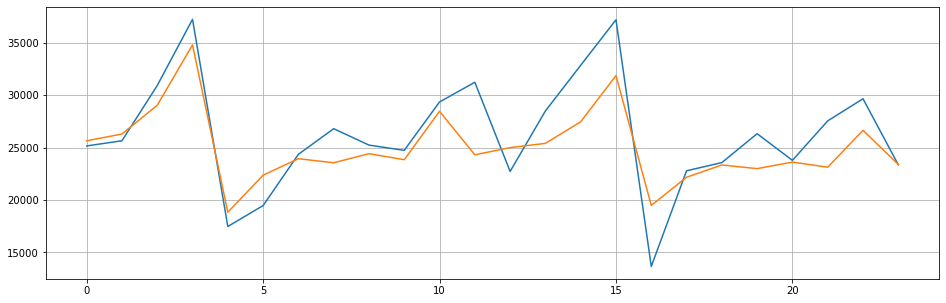

In [39]:
fig = plt.figure(figsize=(16,5))
plt.plot(range(test.shape[0]),test)
plt.plot(range(test.shape[0]),model.predict(n_periods = test.shape[0]))
plt.grid();

In [43]:
model.aic() #AIC却低于auto_arima的结果，所以AIC并不能作为唯一标准的评估指标

2936.648256262213

> **滚动交叉验证（RollingForecastCV）**

> cv = KFold(n_splits=5,shuffle=True,random_state=1412)<br>
> results = cross_validate(reg,Xtrain,Ytrain,cv=cv)

![](https://robjhyndman.com/files/cv1-1.png)

*class*`pmdarima.model_selection.RollingForecastCV(h=1, step=1, initial=None)`
> **h**：验证集中的样本数量，可以输入[1, n_samples]的整数。<br><br>
> **step**：训练集中每次增加的样本数量，必须为大于等于1的正整数。<br><br>
> **initial**：第一次交叉验证时的训练集样本量，如果不填写则按1/3处理。

In [44]:
#使用pm自带的数据集进行尝试
data = pm.datasets.load_wineind()
cv = model_selection.RollingForecastCV(h=1, step=1, initial = 10)
cv_generator = cv.split(data)

In [45]:
data.shape

(176,)

In [46]:
next(cv_generator) #根据Initial初始训练集有10个样本，验证集遵循参数h的设置，只包含一个样本

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([10]))

In [47]:
next(cv_generator) #根据step的设置，训练集每次增加1个样本，验证集继续包含一个样本

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([11]))

In [49]:
cv = model_selection.RollingForecastCV(h=5, step=10, initial = 10)
cv_generator = cv.split(data)

In [50]:
next(cv_generator) #验证集包含10个样本

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([10, 11, 12, 13, 14]))

In [51]:
next(cv_generator) #训练集增加了5个样本，而测试集则从训练集的最后一个样本编号开始取10个样本

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([20, 21, 22, 23, 24]))

In [50]:
#沿用之前的数据和模型
model = pm.ARIMA(order=(2,1,1),seasonal_order=(1,0,1,12),max_iter=500)

In [51]:
cv = model_selection.RollingForecastCV(h=24, step=12, initial=36) #简单粗暴
predictions = model_selection.cross_validate(model, data, cv=cv
                                             , scoring = "mean_squared_error"
                                             , verbose = 2
                                             , error_score = "raise")

[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=3 ..........................................................
[CV] fold=4 ..........................................................
[CV] fold=5 ..........................................................
[CV] fold=6 ..........................................................
[CV] fold=7 ..........................................................
[CV] fold=8 ..........................................................
[CV] fold=9 ..........................................................


In [52]:
predictions #此时返回的分数是MSE

{'test_score': array([1.35362829e+08, 1.08110482e+08, 2.18350836e+07, 1.93216319e+07,
        9.06745175e+07, 1.42626956e+07, 1.32016435e+07, 1.31176511e+07,
        3.57008819e+07, 5.07654646e+06]),
 'fit_time': array([0.11542749, 0.05658126, 0.24898481, 0.2451055 , 0.25712872,
        0.27400494, 0.29775929, 0.3317287 , 0.32977796, 0.37073326]),
 'score_time': array([0.00299215, 0.00299311, 0.00299191, 0.00398993, 0.00298977,
        0.00299382, 0.00299215, 0.00299191, 0.00299191, 0.00299215])}

In [53]:
np.sqrt(predictions["test_score"])

array([11634.55323759, 10397.61907038,  4672.80254671,  4395.63782179,
        9522.31681336,  3776.59841541,  3633.40659805,  3621.82980393,
        5975.02149785,  2253.11927405])

- 滑窗交叉验证（SildingWindowForecastCV）



![](https://miro.medium.com/max/1400/1*HN084lMD15SWjH6epVeSAg.gif)

*class*`pmdarima.model_selection.SlidingWindowForecastCV(h=1, step=1, window_size=None)`
> **h**：验证集中的样本数量，可以输入[1, n_samples]的整数。<br><br>
> **step**：每次向未来滑窗的样本数量，必须为大于等于1的正整数。<br><br>
> **window_size**：滑窗的尺寸大小，如果填写None则按照样本量整除5得到的数来决定。

In [83]:
#使用pm自带的数据集进行尝试
cv = model_selection.SlidingWindowForecastCV(h=1, step=1, window_size = 10)
cv_generator = cv.split(data)

In [84]:
next(cv_generator) #首次进行交叉验证时的数据分割状况

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([10]))

In [85]:
next(cv_generator) #第二次交叉验证时的数据分割状况

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([11]))

In [90]:
cv = model_selection.SlidingWindowForecastCV(h=5, step=10, window_size = 10)
cv_generator = cv.split(data)

In [91]:
next(cv_generator)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([10, 11, 12, 13, 14]))

In [92]:
next(cv_generator)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]), array([20, 21, 22, 23, 24]))

In [61]:
#沿用之前的数据和模型
model = pm.ARIMA(order=(2,1,1),seasonal_order=(1,0,1,12),max_iter=500)

In [65]:
len(data)

176

In [77]:
cv = model_selection.SlidingWindowForecastCV(h=24, step=12, window_size=36) #简单粗暴
predictions = model_selection.cross_validate(model, data, cv=cv
                                             , scoring = "mean_squared_error"
                                             , verbose = 2
                                             , error_score = "raise")

[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=3 ..........................................................
[CV] fold=4 ..........................................................
[CV] fold=5 ..........................................................
[CV] fold=6 ..........................................................
[CV] fold=7 ..........................................................
[CV] fold=8 ..........................................................
[CV] fold=9 ..........................................................


In [78]:
predictions #此时返回的分数是MSE

{'test_score': array([1.35362847e+08, 1.20867167e+08, 1.48347243e+08, 2.49879706e+08,
        2.32217899e+08, 4.01511152e+08, 1.92061264e+08, 2.51755311e+08,
        1.50798724e+08, 1.92747682e+08]),
 'fit_time': array([0.15061998, 0.09329152, 0.09452987, 0.0640142 , 0.06852245,
        0.08252764, 0.11053348, 0.1960628 , 0.08552909, 0.13313174]),
 'score_time': array([0.00500083, 0.00400162, 0.00400114, 0.00300074, 0.00300026,
        0.0030005 , 0.0030005 , 0.0040009 , 0.00300097, 0.00400114])}

In [79]:
np.sqrt(predictions["test_score"])

array([11634.55400113, 10993.96047191, 12179.78831408, 15807.58382521,
       15238.69740534, 20037.7431982 , 13858.61697326, 15866.79900091,
       12280.01317219, 13883.35991075])

In [101]:
cv = model_selection.SlidingWindowForecastCV(h=24, step=1, window_size=132)
predictions = model_selection.cross_validate(model, data, cv=cv
                                             , scoring = "mean_squared_error"
                                             , verbose = 2
                                             , error_score = "raise")

[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=3 ..........................................................
[CV] fold=4 ..........................................................
[CV] fold=5 ..........................................................
[CV] fold=6 ..........................................................
[CV] fold=7 ..........................................................
[CV] fold=8 ..........................................................
[CV] fold=9 ..........................................................
[CV] fold=10 .........................................................
[CV] fold=11 .........................................................
[CV] fold=12 .........................................................
[CV] fold=13 .........................................................
[CV] f

In [102]:
np.sqrt(predictions["test_score"])

array([5975.54363899, 8134.88326278, 6374.21838162, 8864.35458939,
       4864.82173893, 4506.74512298, 1685.79303951, 2117.69191857,
       4350.35942616, 1797.75428519, 7480.31170696, 2401.96193296,
       3493.53477981, 9042.33743958, 9282.56918209, 2075.69121351,
       2114.72656858, 8974.65265242, 9769.55599603, 2087.17546223,
       6427.50477832])

In [108]:
#借用pmdarima的单变量数据做实例
from pmdarima.datasets import load_wineind
data1 = pd.DataFrame(load_wineind())

In [109]:
data1 #最典型的单变量数据

,0
0,15136.0
1,16733.0
2,20016.0
3,17708.0
4,18019.0
...,...
171,26323.0
172,23779.0
173,27549.0
174,29660.0


In [68]:
data.shift(1)

,0
0,NaN
1,15136.0
2,16733.0
3,20016.0
4,17708.0
...,...
171,23565.0
172,26323.0
173,23779.0
174,27549.0


In [69]:
data.shift(2)

,0
0,NaN
1,NaN
2,15136.0
3,16733.0
4,20016.0
...,...
171,22784.0
172,23565.0
173,26323.0
174,23779.0


In [88]:
#构建索引为数字的、而非时间的空白特征矩阵
#对单变量时间序列来说，只要去掉索引中的时间即可
df = pd.DataFrame(index=range(data.shape[0]))
#在该矩阵上进行拼接循环，p设置为12
for i in range(12,0,-1):
    df = pd.concat([df,data.shift(i)],axis=1,ignore_index=True)
#将原始标签添加进矩阵
df = pd.concat([df,pd.DataFrame(df.index),data],axis=1,ignore_index=True)

In [89]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,15136.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15136.0,1,16733.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15136.0,16733.0,2,20016.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15136.0,16733.0,20016.0,3,17708.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15136.0,16733.0,20016.0,17708.0,4,18019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,26805.0,25236.0,24735.0,29356.0,31234.0,22724.0,28496.0,32857.0,37198.0,13652.0,22784.0,23565.0,171,26323.0
172,25236.0,24735.0,29356.0,31234.0,22724.0,28496.0,32857.0,37198.0,13652.0,22784.0,23565.0,26323.0,172,23779.0
173,24735.0,29356.0,31234.0,22724.0,28496.0,32857.0,37198.0,13652.0,22784.0,23565.0,26323.0,23779.0,173,27549.0
174,29356.0,31234.0,22724.0,28496.0,32857.0,37198.0,13652.0,22784.0,23565.0,26323.0,23779.0,27549.0,174,29660.0


In [90]:
#删除带有缺失值的行
df = df.dropna()

In [97]:
#构建列名
columns = []
for i in [*range(12,0,-1),"date","target"]:
    if type(i) == int:
        day = str(i)
        columns.append("t-{}".format(day))
    else:
        columns.append(i)

In [98]:
columns

['t-12',
 't-11',
 't-10',
 't-9',
 't-8',
 't-7',
 't-6',
 't-5',
 't-4',
 't-3',
 't-2',
 't-1',
 'date',
 'target']

In [99]:
#添加列名、恢复索引
df.columns = [*columns]
df.index = range(df.shape[0])

In [101]:
df #构建完毕，以历史12天的数据（12天的滑窗）构建出单变量的特征矩阵

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,date,target
0,15136.0,16733.0,20016.0,17708.0,18019.0,19227.0,22893.0,23739.0,21133.0,22591.0,26786.0,29740.0,12,15028.0
1,16733.0,20016.0,17708.0,18019.0,19227.0,22893.0,23739.0,21133.0,22591.0,26786.0,29740.0,15028.0,13,17977.0
2,20016.0,17708.0,18019.0,19227.0,22893.0,23739.0,21133.0,22591.0,26786.0,29740.0,15028.0,17977.0,14,20008.0
3,17708.0,18019.0,19227.0,22893.0,23739.0,21133.0,22591.0,26786.0,29740.0,15028.0,17977.0,20008.0,15,21354.0
4,18019.0,19227.0,22893.0,23739.0,21133.0,22591.0,26786.0,29740.0,15028.0,17977.0,20008.0,21354.0,16,19498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,26805.0,25236.0,24735.0,29356.0,31234.0,22724.0,28496.0,32857.0,37198.0,13652.0,22784.0,23565.0,171,26323.0
160,25236.0,24735.0,29356.0,31234.0,22724.0,28496.0,32857.0,37198.0,13652.0,22784.0,23565.0,26323.0,172,23779.0
161,24735.0,29356.0,31234.0,22724.0,28496.0,32857.0,37198.0,13652.0,22784.0,23565.0,26323.0,23779.0,173,27549.0
162,29356.0,31234.0,22724.0,28496.0,32857.0,37198.0,13652.0,22784.0,23565.0,26323.0,23779.0,27549.0,174,29660.0


In [112]:
from pmdarima.datasets import load_msft
data2 = load_msft()

data2

,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0
...,...,...,...,...,...,...,...
7978,2017-11-06,84.20000,84.70000,84.08250,84.47000,19852151,0
7979,2017-11-07,84.77000,84.90000,83.93000,84.26000,17927878,0
7980,2017-11-08,84.14000,84.61000,83.83000,84.56000,18029584,0
7981,2017-11-09,84.11000,84.27000,82.90000,84.09000,21175384,0


In [119]:
data2.head() #标签是Close收盘价，因此我们可以先将Close至于最后一列，同时我们不需要时间

,Open,High,Low,Volume,OpenInt,Date,Close
0,0.06720,0.07533,0.06720,1371330506,0,1986-03-13,0.07533
1,0.07533,0.07533,0.07533,409569463,0,1986-03-14,0.07533
2,0.07533,0.07533,0.07533,176995245,0,1986-03-17,0.07533
3,0.07533,0.07533,0.07533,90067008,0,1986-03-18,0.07533
4,0.07533,0.07533,0.07533,63655515,0,1986-03-19,0.07533


In [115]:
data2.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')

In [117]:
data2 = data2.reindex(columns = ['Open', 'High', 'Low','Volume', 'OpenInt',"Date","Close"])

In [121]:
data2.head() #用于构成特征矩阵的是Open到OpenInt这5列

,Open,High,Low,Volume,OpenInt,Date,Close
0,0.06720,0.07533,0.06720,1371330506,0,1986-03-13,0.07533
1,0.07533,0.07533,0.07533,409569463,0,1986-03-14,0.07533
2,0.07533,0.07533,0.07533,176995245,0,1986-03-17,0.07533
3,0.07533,0.07533,0.07533,90067008,0,1986-03-18,0.07533
4,0.07533,0.07533,0.07533,63655515,0,1986-03-19,0.07533


In [126]:
[*range(7,-1,-1)] #今天 + 前7天，总共8天

[7, 6, 5, 4, 3, 2, 1, 0]

In [123]:
#构建索引为数字的、而非时间的空白特征矩阵
df = pd.DataFrame(index=range(data2.shape[0]))
label = pd.DataFrame(index=range(data2.shape[0]))
X = data2.iloc[:,:5]
#在该矩阵上进行拼接循环，p设置为7
for i in range(7,-1,-1):
    df = pd.concat([df,X.shift(i)],axis=1,ignore_index=True)
    label = pd.concat([label,data2.iloc[:,-1].shift(i)],axis=1,ignore_index=True)

In [128]:
df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.06720,0.07533,0.06720,1371330506,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.06720,0.07533,0.06720,1.371331e+09,0.0,0.07533,0.07533,0.07533,409569463,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.07533,0.07533,0.07533,4.095695e+08,0.0,0.07533,0.07533,0.07533,176995245,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.07533,0.07533,0.07533,1.769952e+08,0.0,0.07533,0.07533,0.07533,90067008,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.07533,0.07533,0.07533,9.006701e+07,0.0,0.07533,0.07533,0.07533,63655515,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7978,79.20,79.420,78.750,31601122.0,0.0,84.37,86.200,83.610,71024821.0,0.0,...,84.08000,84.54000,83.40000,1.763354e+07,0.0,84.20000,84.70000,84.08250,19852151,0
7979,84.37,86.200,83.610,71024821.0,0.0,83.80,84.325,83.105,31756653.0,0.0,...,84.20000,84.70000,84.08250,1.985215e+07,0.0,84.77000,84.90000,83.93000,17927878,0
7980,83.80,84.325,83.105,31756653.0,0.0,84.36,84.360,83.110,27086575.0,0.0,...,84.77000,84.90000,83.93000,1.792788e+07,0.0,84.14000,84.61000,83.83000,18029584,0
7981,84.36,84.360,83.110,27086575.0,0.0,83.68,83.760,82.880,22307371.0,0.0,...,84.14000,84.61000,83.83000,1.802958e+07,0.0,84.11000,84.27000,82.90000,21175384,0


In [125]:
df.shape #一天5个特征，8天共40个特征

(7983, 40)

In [129]:
label #最后一列就是真实标签

,0,1,2,3,4,5,6,7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07533
1,NaN,NaN,NaN,NaN,NaN,NaN,0.07533,0.07533
2,NaN,NaN,NaN,NaN,NaN,0.07533,0.07533,0.07533
3,NaN,NaN,NaN,NaN,0.07533,0.07533,0.07533,0.07533
4,NaN,NaN,NaN,0.07533,0.07533,0.07533,0.07533,0.07533
...,...,...,...,...,...,...,...,...
7978,78.76,83.81,83.89,83.18000,83.18000,84.05000,84.14000,84.47000
7979,83.81,83.89,83.18,83.18000,84.05000,84.14000,84.47000,84.26000
7980,83.89,83.18,83.18,84.05000,84.14000,84.47000,84.26000,84.56000
7981,83.18,83.18,84.05,84.14000,84.47000,84.26000,84.56000,84.09000


In [136]:
#将两个矩阵合并，并删除缺失值
train = pd.concat([df,label,data2["Date"]],axis=1,ignore_index=True)
train = train.dropna()
train.index = range(train.shape[0])

In [137]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.06720,0.07533,0.06720,1.371331e+09,0.0,0.07533,0.07533,0.07533,409569463.0,0.0,...,0,0.07533,0.07533,0.07533,0.07533,0.07533,0.07533,0.06720,0.06720,1986-03-24
1,0.07533,0.07533,0.07533,4.095695e+08,0.0,0.07533,0.07533,0.07533,176995245.0,0.0,...,0,0.07533,0.07533,0.07533,0.07533,0.07533,0.06720,0.06720,0.06720,1986-03-25
2,0.07533,0.07533,0.07533,1.769952e+08,0.0,0.07533,0.07533,0.07533,90067008.0,0.0,...,0,0.07533,0.07533,0.07533,0.07533,0.06720,0.06720,0.06720,0.06720,1986-03-26
3,0.07533,0.07533,0.07533,9.006701e+07,0.0,0.07533,0.07533,0.07533,63655515.0,0.0,...,0,0.07533,0.07533,0.07533,0.06720,0.06720,0.06720,0.06720,0.07533,1986-03-27
4,0.07533,0.07533,0.07533,6.365552e+07,0.0,0.07533,0.07533,0.06720,77665088.0,0.0,...,0,0.07533,0.07533,0.06720,0.06720,0.06720,0.06720,0.07533,0.07533,1986-03-31


In [138]:
#构造列名
data2.columns

Index(['Open', 'High', 'Low', 'Volume', 'OpenInt', 'Date', 'Close'], dtype='object')

In [145]:
Columns = ['Open', 'High', 'Low', 'Volume', 'OpenInt']
NewColumns = []
NewLabel = []
for i in [*range(7,-1,-1)]:
    day = str(i)
    NewLabel.append("t-{}".format(day) + "label")
    for name in Columns:
        NewColumns.append("t-{}".format(day) + name)
NewColumns.extend(NewLabel)
NewColumns.append("Date")

In [146]:
NewColumns

['t-7Open',
 't-7High',
 't-7Low',
 't-7Volume',
 't-7OpenInt',
 't-6Open',
 't-6High',
 't-6Low',
 't-6Volume',
 't-6OpenInt',
 't-5Open',
 't-5High',
 't-5Low',
 't-5Volume',
 't-5OpenInt',
 't-4Open',
 't-4High',
 't-4Low',
 't-4Volume',
 't-4OpenInt',
 't-3Open',
 't-3High',
 't-3Low',
 't-3Volume',
 't-3OpenInt',
 't-2Open',
 't-2High',
 't-2Low',
 't-2Volume',
 't-2OpenInt',
 't-1Open',
 't-1High',
 't-1Low',
 't-1Volume',
 't-1OpenInt',
 't-0Open',
 't-0High',
 't-0Low',
 't-0Volume',
 't-0OpenInt',
 't-7label',
 't-6label',
 't-5label',
 't-4label',
 't-3label',
 't-2label',
 't-1label',
 't-0label',
 'Date']

In [147]:
train.columns = [*NewColumns]

In [149]:
train.head()

,t-7Open,t-7High,t-7Low,t-7Volume,t-7OpenInt,t-6Open,t-6High,t-6Low,t-6Volume,t-6OpenInt,...,t-0OpenInt,t-7label,t-6label,t-5label,t-4label,t-3label,t-2label,t-1label,t-0label,Date
0,0.06720,0.07533,0.06720,1.371331e+09,0.0,0.07533,0.07533,0.07533,409569463.0,0.0,...,0,0.07533,0.07533,0.07533,0.07533,0.07533,0.07533,0.06720,0.06720,1986-03-24
1,0.07533,0.07533,0.07533,4.095695e+08,0.0,0.07533,0.07533,0.07533,176995245.0,0.0,...,0,0.07533,0.07533,0.07533,0.07533,0.07533,0.06720,0.06720,0.06720,1986-03-25
2,0.07533,0.07533,0.07533,1.769952e+08,0.0,0.07533,0.07533,0.07533,90067008.0,0.0,...,0,0.07533,0.07533,0.07533,0.07533,0.06720,0.06720,0.06720,0.06720,1986-03-26
3,0.07533,0.07533,0.07533,9.006701e+07,0.0,0.07533,0.07533,0.07533,63655515.0,0.0,...,0,0.07533,0.07533,0.07533,0.06720,0.06720,0.06720,0.06720,0.07533,1986-03-27
4,0.07533,0.07533,0.07533,6.365552e+07,0.0,0.07533,0.07533,0.06720,77665088.0,0.0,...,0,0.07533,0.07533,0.06720,0.06720,0.06720,0.06720,0.07533,0.07533,1986-03-31
